# Readme

logon_info.csv (~850k records)
* Fields: id, date, user, pc, activity (Logon/Logoff)
* Logoff requires preceding logon
* Each user has an assigned machine, but can share others
* 100 machines shared (physically shared) by some of the users in addition to their assigned PC. 
* Some logons occur after-hours 
*Note: Screen unlocks are recorded as logons. Screen locks are not recorded.
* 12 of the users are IT administrators

device_info.csv (~66k records)
* Fields: id, date, user, pc, activity (connect/disconnect)
* Some users use a portable zip drive
* Some connect(s) may be missing disconnect(s), since machine may be turned off without a proper disconnect. 


Employees_info Folder
* 18 Employee files (~1k records each file)
  - Fields: employee_name, user_id, email, domain, role
  - Record of who is employed at the end of the month 

HTTP_info.csv (~3.5M records)
* Fields: id, date, user, pc, url
* Up to 15 URLs visited daily between daily logon and daily logoff
* Up to 5 URLs visited daily after-hours


Additional Note:
Field ids are unique within a .csv file but are not necessarily unique across all files.


# Notes

Please read the README file before starting any analysis


Goals:
Make sure data is readable 
			- Check that pc id is the same file to file
			- Rename indices/column names with easier identifiers
			- Take characters and turn them into unique identifiers
				- i.e. user id = 1, logon times = 2, etc.


Find various summaries 
	- Focus on summaries not models
	- Maybe start looking at traffic densities
		- i.e. Logon times, computer usage, etc.
		- We can discuss what to look at together	


Comprehend the summaries
	- Look for patterns, anomalies, or anything interesting from the data
	- Question the summaries
	- This will help us figure out what the research objective will be


Start thinking about models
	- This is when we can start looking at models 
	- Apply questions from summaries to an analysis


=======================================================================

9/20/17
====
Some topics that we can research
device_info
1. What time do they usually connect?
2. Which user connect more frequently?
3. Which PC is used more frequently?
4. Are there some users who is prefer to use specific PC?
5. Are there some users who often turns off the PC without disconnection?
6. How long is the connection duration?


logon_info
Any questions about connection can be changed to logon problem.

http_info
1. Which website do they often browse?
2. Are there some user who has the same interests?
3. Are there some rush hours that some websites are often been visited?

Employees_info
1. Which role has the most employees?
2. Which role has the longest employment period?
3. What is the distribution of employment period?
(existing problem)

What can we get from column “Domain” and “Email”? 


1. Any employees who still access the system even after they were no longer employees?
2. Are there any PCs accessed by more than one person?
3. Which URLs are visited most frequently by the employees?
4. Any employees who don't have any http info at all?
5. What kind of employees visit use their system after-hours? Classification based on employee roles....




If some sites were visited frequently in specific time, were they correlated to any event?
Are there some specific systems that are accessed by high privilege employees like VPs?
Difference in usage by employee role..
What derived variables can be created?





http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-identify-the-distribution-of-your-data-using-minitab

This can be used to find distribution of data


Viz?? Link??











In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from  datetime import datetime
import os
import nltk
%matplotlib inline

In [9]:
data_dir = "C:\\Users\\talha\\Documents\\DA\\DataSets1_9182017\\DataSets1_9182017\\"
logon_df = pd.read_csv(data_dir+"logon_info.csv", index_col=0)
dev_df = pd.read_csv(data_dir+"device_info.csv", index_col=0)
http_df = pd.read_csv(data_dir+"http_info.csv", index_col=0, header=None, names=['date', 'user', 'pc', 'url'])
logon_df['date'] = pd.to_datetime(logon_df['date'])
print(logon_df.shape)
print(dev_df.shape)
print(http_df.shape)

(849579, 4)
(65668, 4)
(3451665, 4)


### Save the loaded dataframes

In [10]:
dev_df.to_pickle('dev_df')
http_df.to_pickle('http_df')
logon_df.to_pickle('logon_df')

### Read back the saved data

In [3]:
dev_df = pd.read_pickle('dev_df')
http_df = pd.read_pickle('http_df')
logon_df = pd.read_pickle('logon_df')

In [4]:
http_df.head()

,date,user,pc,url
{M8H9-W9NL75TH-1322KOLO},01/04/2010 07:08:47,ACME/AMA0606,PC-1514,http://cnet.com
{V0E1-R0FE91SC-2381GTDZ},01/04/2010 07:35:19,ACME/DBM0698,PC-1444,http://force.open.com
{V7C8-H6KA39YG-3352HMOW},01/04/2010 07:40:40,ACME/HBF0035,PC-0991,http://tendencystem.org
{O9P7-D9DL54YQ-9903OMYE},01/04/2010 07:52:25,ACME/SVC0175,PC-3384,http://bent.cup.org
{L3J0-E4RF05KN-7341OQVW},01/04/2010 07:55:50,ACME/CMU0028,PC-4253,http://taxpotato.east.org


In [5]:
logon_df.head()

,date,user,pc,activity
id,,,,
{Y6O4-A7KC67IN-0899AOZK},2010-01-04 00:10:37,ACME/KEE0997,PC-1914,Logon
{O5Y6-O7CJ02JC-6704RWBS},2010-01-04 00:52:16,ACME/KEE0997,PC-1914,Logoff
{D2D1-C6EB14QJ-2100RSZO},2010-01-04 01:17:20,ACME/KEE0997,PC-3363,Logon
{H9W1-X0MC70BT-6065RPAT},2010-01-04 01:28:34,ACME/KEE0997,PC-3363,Logoff
{H3H4-S5AZ00AZ-9560IYHC},2010-01-04 01:57:30,ACME/BJM0992,PC-3058,Logon


In [6]:
dev_df.head()

,date,user,pc,activity
id,,,,
{S7A7-Y8QZ65MW-8738SAZP},01/04/2010 07:12:31,ACME/RES0962,PC-3736,Connect
{G7A8-G1OB94NR-3006NTXH},01/04/2010 07:35:40,ACME/BJC0569,PC-2588,Connect
{R3L8-N0LW95FR-8358LLXS},01/04/2010 08:00:38,ACME/EMZ0196,PC-1479,Connect
{I2F1-B5FB51FL-3128HBUL},01/04/2010 08:02:14,ACME/ZKH0388,PC-1021,Connect
{P7R6-C5TV18CT-1677DWWM},01/04/2010 08:20:17,ACME/RES0962,PC-3736,Disconnect


### Histogram plot for the times users logon in their machines

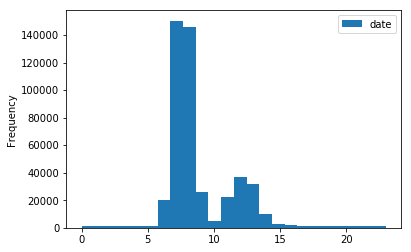

In [7]:
time_logon = logon_df[['date', 'activity']]
time_logon = time_logon[time_logon['activity'] == 'Logon']
time_logon['date'] = time_logon['date'].apply(lambda x : x.hour)
time_logon.plot.hist(bins=24)

### Histogram plot for the times users logoff from their machines

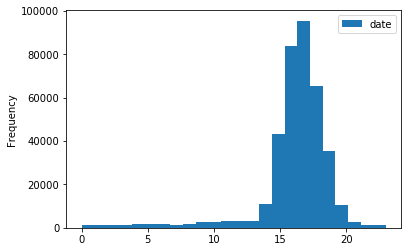

In [16]:
time_logon = logon_df[['date', 'activity']]
time_logon = time_logon[time_logon['activity'] == 'Logoff']
time_logon['date'] = time_logon['date'].apply(lambda x : x.hour)
time_logon.plot.hist(bins=24)

### URLs visited by employees

In [26]:
url_visits = http_df['url'].value_counts()
print (url_visits.head())

http://google.com      745771
http://facebook.com    304103
http://yahoo.com       121966
http://youtube.com     109341
http://amazon.com       74749
Name: url, dtype: int64


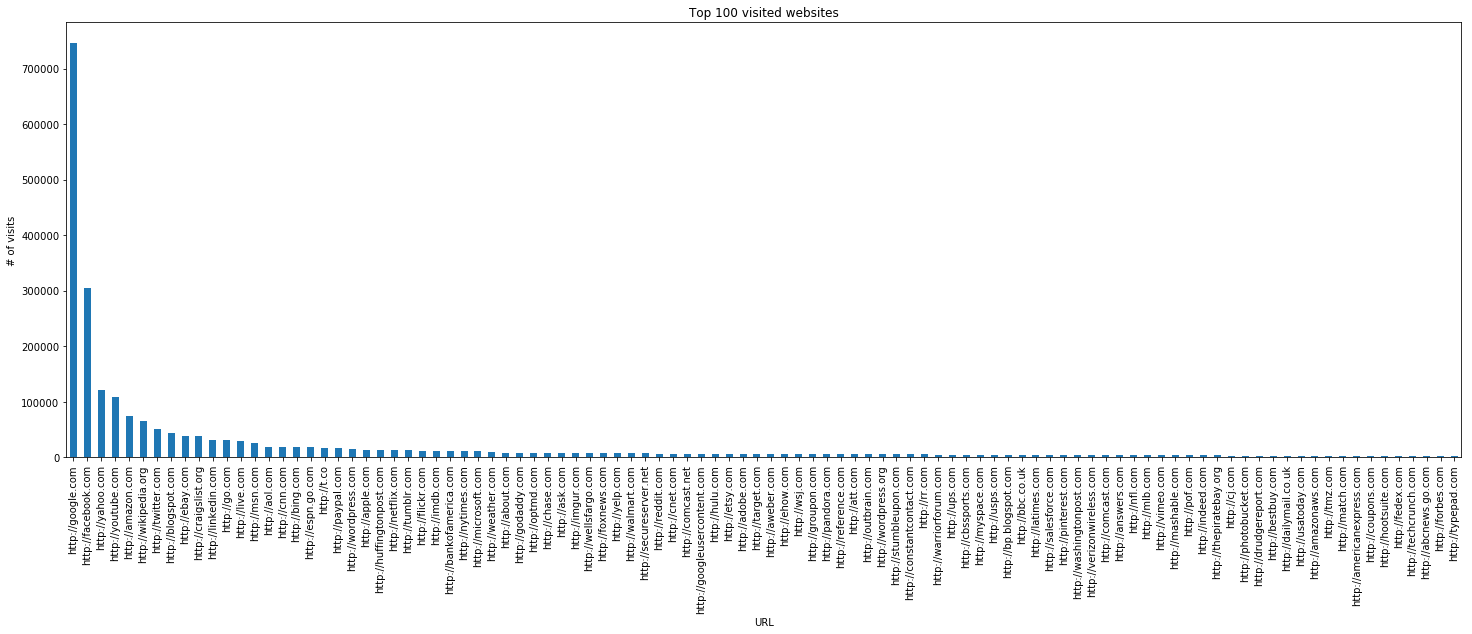

In [45]:
total_visited = 100
fig, ax = plt.subplots(1,1,figsize=(25,8))
ax.set_xlabel("URL")
ax.set_ylabel("# of visits")
ax.set_title("Top " + str(total_visited) + " visited websites")
url_visits[0:total_visited].plot(ax=ax, kind='bar')

In [46]:
only_logons = logon_df[logon_df['activity'] == 'Logon']
total_logons = only_logons.shape[0]
total_logoffs = logon_df.shape[0] - only_logons.shape[0]
print("Number of logons: " + str(total_logons))
print("Number of logoffs: " + str(total_logoffs))

Number of logons: 470877
Number of logoffs: 378702


In [47]:
log_con_df = pd.merge(logon_df, dev_df, how='inner', left_on='pc', right_on='pc')

In [48]:
log_con_df = log_con_df.set_index(['pc',''])

,date_x,user_x,pc,activity_x,date_y,user_y,activity_y
0,2010-01-04 02:01:26,ACME/CLB0995,PC-1127,Logon,01/04/2010 08:30:09,ACME/AQG0678,Connect
1,2010-01-04 02:01:26,ACME/CLB0995,PC-1127,Logon,01/04/2010 09:23:35,ACME/AQG0678,Disconnect
2,2010-01-04 02:01:26,ACME/CLB0995,PC-1127,Logon,01/05/2010 09:50:41,ACME/AQG0678,Connect
3,2010-01-04 02:01:26,ACME/CLB0995,PC-1127,Logon,01/05/2010 10:12:15,ACME/AQG0678,Disconnect
4,2010-01-04 02:01:26,ACME/CLB0995,PC-1127,Logon,01/06/2010 11:43:32,ACME/AQG0678,Connect


In [51]:
df = logon_df.set_index(['pc','user'])
df

date activity
pc      user                                     
PC-1914 ACME/KEE0997 2010-01-04 00:10:37    Logon
        ACME/KEE0997 2010-01-04 00:52:16   Logoff
PC-3363 ACME/KEE0997 2010-01-04 01:17:20    Logon
        ACME/KEE0997 2010-01-04 01:28:34   Logoff
PC-3058 ACME/BJM0992 2010-01-04 01:57:30    Logon
PC-1127 ACME/CLB0995 2010-01-04 02:01:26    Logon
        ACME/CLB0995 2010-01-04 02:03:34   Logoff
PC-3058 ACME/BJM0992 2010-01-04 02:16:17   Logoff
PC-0585 ACME/BJM0992 2010-01-04 02:25:16    Logon
        ACME/BJM0992 2010-01-04 02:30:13   Logoff
PC-0433 ACME/CRC0996 2010-01-04 02:39:10    Logon
PC-2564 ACME/IRC0991 2010-01-04 03:04:45    Logon
        ACME/IRC0991 2010-01-04 03:06:53   Logoff
PC-3570 ACME/CLN0999 2010-01-04 03:16:08    Logon
PC-0433 ACME/CRC0996 2010-01-04 03:20:19   Logoff
PC-4163 ACME/DSM0990 2010-01-04 03:26:35    Logon
PC-3570 ACME/CLN0999 2010-01-04 03:32:38   Logoff
PC-4163 ACME/DSM0990 2010-01-04 03:51:54   Logoff
PC-3916 ACME/CRC0996 2010-01-04 04:08:42    Logon
PC-1939 ACME/KEE0997 2010-01-04 04:17:35    Logon
PC-0975 ACME/JCC0998 2010-01-04 04:20:52    Logon
PC-3916 ACME/CRC0996 2010-01-04 04:25:47   Logoff
PC-0975 ACME/JCC0998 2010-01-04 04:27:37   Logoff
PC-2613 ACME/CLN0999 2010-01-04 04:33:46    Logon
PC-3366 ACME/CRC0996 2010-01-04 04:58:04    Logon
PC-1939 ACME/KEE0997 2010-01-04 05:01:16   Logoff
PC-1479 ACME/CLB0995 2010-01-04 05:05:45    Logon
PC-2613 ACME/CLN0999 2010-01-04 05:17:32   Logoff
PC-1479 ACME/CLB0995 2010-01-04 05:17:53   Logoff
PC-3366 ACME/CRC0996 2010-01-04 05:23:19   Logoff
...                                  ...      ...
PC-4475 ACME/JCC0998 2011-05-13 22:56:24   Logoff
PC-2644 ACME/KEE0997 2011-05-13 23:06:21   Logoff
PC-1037 ACME/ARS0993 2011-05-13 23:13:42    Logon
PC-0115 ACME/DSM0990 2011-05-13 23:16:06   Logoff
PC-1655 ACME/BJM0992 2011-05-13 23:25:01    Logon
        ACME/BJM0992 2011-05-13 23:29:54   Logoff
PC-0807 ACME/JLL0301 2011-05-13 23:40:21   Logoff
PC-1037 ACME/ARS0993 2011-05-13 23:46:33   Logoff
PC-3490 ACME/JMM0759 2011-05-13 23:47:24    Logon
        ACME/JMM0759 2011-05-14 00:56:38   Logoff
PC-4442 ACME/DFZ0063 2011-05-14 01:01:21    Logon
PC-1651 ACME/NHH0566 2011-05-14 01:13:26   Logoff
PC-4147 ACME/AIB0797 2011-05-14 01:46:54    Logon
PC-3240 ACME/MSV0506 2011-05-14 01:59:37    Logon
PC-3081 ACME/SDC0032 2011-05-14 02:22:29    Logon
PC-4442 ACME/DFZ0063 2011-05-14 02:26:46   Logoff
PC-1834 ACME/BIR0534 2011-05-14 03:01:28    Logon
PC-2214 ACME/RBY0065 2011-05-14 03:43:47    Logon
PC-3081 ACME/SDC0032 2011-05-14 04:17:20   Logoff
PC-2214 ACME/RBY0065 2011-05-14 04:35:48   Logoff
PC-2501 ACME/DIS0382 2011-05-14 04:38:34    Logon
PC-3531 ACME/SRN0275 2011-05-14 04:39:20    Logon
PC-0719 ACME/TKH0211 2011-05-14 04:59:02   Logoff
PC-3240 ACME/MSV0506 2011-05-14 04:59:36   Logoff
PC-1834 ACME/BIR0534 2011-05-14 05:01:17   Logoff
PC-2501 ACME/DIS0382 2011-05-14 05:16:52   Logoff
PC-0980 ACME/DDK0417 2011-05-14 05:40:53    Logon
PC-4147 ACME/AIB0797 2011-05-14 06:11:32   Logoff
PC-0980 ACME/DDK0417 2011-05-14 06:12:50   Logoff
PC-3531 ACME/SRN0275 2011-05-14 06:18:12   Logoff

[849579 rows x 2 columns]

In [52]:
c_df = dev_df.set_index(['pc','user'])
c_df

,,date,activity
pc,user,,
PC-3736,ACME/RES0962,01/04/2010 07:12:31,Connect
PC-2588,ACME/BJC0569,01/04/2010 07:35:40,Connect
PC-1479,ACME/EMZ0196,01/04/2010 08:00:38,Connect
PC-1021,ACME/ZKH0388,01/04/2010 08:02:14,Connect
PC-3736,ACME/RES0962,01/04/2010 08:20:17,Disconnect
PC-0282,ACME/CVW0133,01/04/2010 08:23:17,Connect
PC-4225,ACME/RQH0770,01/04/2010 08:29:40,Connect
PC-1127,ACME/AQG0678,01/04/2010 08:30:09,Connect
PC-1730,ACME/OJH0425,01/04/2010 08:35:46,Connect


# Loading Employee info  -- Dataset 2

In [3]:
import collections
#% ls "C:\Users\talha\Documents\DA\da_project\dataset2\LDAP"
ldap_dir = "C:\\Users\\talha\\Documents\\DA\\da_project\\dataset2\\LDAP\\"
employee_info_files = [f for f in os.listdir(ldap_dir) if os.path.isfile(os.path.join(ldap_dir, f))]
employee_info=collections.OrderedDict()
count = 0
for _file in employee_info_files:
    employee_info[_file] = pd.read_csv(ldap_dir+_file, index_col=0)
    employee_info[_file]['month'] = _file
    if count == 0:
        employee_df = employee_info[_file]
    else:
        employee_df = pd.merge(employee_df, employee_info[_file], how='left', left_on='user_id', right_on='user_id')
    count+=1
    print(_file, employee_info[_file].shape)

2009-12.csv (1000, 9)
2010-01.csv (1000, 9)
2010-02.csv (989, 9)
2010-03.csv (982, 9)
2010-04.csv (980, 9)
2010-05.csv (974, 9)
2010-06.csv (968, 9)
2010-07.csv (961, 9)
2010-08.csv (947, 9)
2010-09.csv (934, 9)
2010-10.csv (918, 9)
2010-11.csv (906, 9)
2010-12.csv (890, 9)
2011-01.csv (878, 9)
2011-02.csv (868, 9)
2011-03.csv (857, 9)
2011-04.csv (846, 9)
2011-05.csv (845, 9)


In [4]:
print(employee_df.columns)

Index(['user_id', 'email_x', 'role_x', 'business_unit_x', 'functional_unit_x',
       'department_x', 'team_x', 'supervisor_x', 'month_x', 'email_y',
       ...
       'supervisor_x', 'month_x', 'email_y', 'role_y', 'business_unit_y',
       'functional_unit_y', 'department_y', 'team_y', 'supervisor_y',
       'month_y'],
      dtype='object', length=145)


In [15]:
import collections
#% ls "C:\Users\talha\Documents\DA\da_project\dataset2\LDAP"
ldap_dir = "C:\\Users\\talha\\Documents\\DA\\da_project\\dataset2\\LDAP\\"
employee_info_files = [f for f in os.listdir(ldap_dir) if os.path.isfile(os.path.join(ldap_dir, f))]
employee_info=collections.OrderedDict()
count = 0
for _file in employee_info_files:
    employee_info[_file] = pd.read_csv(ldap_dir+_file, index_col=0)
    employee_info[_file]['month'] = _file.split('.')[0]
    if count == 0:
        employee_df = employee_info[_file]
    else:
        employee_df = employee_df.append(employee_info[_file])
    count+=1

In [16]:
employee_df['month'] = pd.to_datetime(employee_df['month'])

In [17]:
employee_df.head()

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,month
employee_name,,,,,,,,,
Calvin Edan Love,CEL0561,Calvin.Edan.Love@dtaa.com,ComputerProgrammer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,2009-12-01
Christine Reagan Deleon,CRD0624,Christine.Reagan.Deleon@dtaa.com,Salesman,1,5 - SalesAndMarketing,2 - Sales,3 - RegionalSales,Winter Veda Burks,2009-12-01
Jade Felicia Caldwell,JFC0557,Jade.Felicia.Caldwell@dtaa.com,SoftwareEngineer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,2009-12-01
Aquila Stewart Dejesus,ASD0577,Aquila.Stewart.Dejesus@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,3 - AssemblyDept,Whilemina Pandora England,2009-12-01
Micah Abdul Rojas,MAR0955,Micah.Abdul.Rojas@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,6 - AssemblyDept,Sandra Beverly Diaz,2009-12-01


In [18]:
tmp_df = employee_info['2009-12.csv']
tmp_df.head()

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,month
employee_name,,,,,,,,,
Calvin Edan Love,CEL0561,Calvin.Edan.Love@dtaa.com,ComputerProgrammer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,2009-12
Christine Reagan Deleon,CRD0624,Christine.Reagan.Deleon@dtaa.com,Salesman,1,5 - SalesAndMarketing,2 - Sales,3 - RegionalSales,Winter Veda Burks,2009-12
Jade Felicia Caldwell,JFC0557,Jade.Felicia.Caldwell@dtaa.com,SoftwareEngineer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,2009-12
Aquila Stewart Dejesus,ASD0577,Aquila.Stewart.Dejesus@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,3 - AssemblyDept,Whilemina Pandora England,2009-12
Micah Abdul Rojas,MAR0955,Micah.Abdul.Rojas@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,6 - AssemblyDept,Sandra Beverly Diaz,2009-12


### Should use left join here instead of inner join with the first file. Otherwise we're losing any information that is in other files

In [19]:
se_df = employee_df[['month']]
print(se_df.shape)
se_df = pd.DataFrame({'count' : se_df.groupby( ["employee_name"] ).size()}).reset_index()
se_df = se_df.set_index('employee_name')
se_df['left'] = (se_df['count']<18).astype(int)
print(se_df.head())

test=pd.merge(tmp_df, se_df, left_index=True, right_index=True)
test.head()

(16743, 1)
                        count  left
employee_name                      
Aaron Porter Gutierrez     18     0
Abdul Ralph Deleon         18     0
Abel Adam Morton           11     1
Abel Reese Boone           18     0
Adam Ishmael Mcdaniel      18     0


,user_id,email,role,business_unit,functional_unit,department,team,supervisor,month,count,left
employee_name,,,,,,,,,,,
Calvin Edan Love,CEL0561,Calvin.Edan.Love@dtaa.com,ComputerProgrammer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,2009-12,18,0
Christine Reagan Deleon,CRD0624,Christine.Reagan.Deleon@dtaa.com,Salesman,1,5 - SalesAndMarketing,2 - Sales,3 - RegionalSales,Winter Veda Burks,2009-12,3,1
Jade Felicia Caldwell,JFC0557,Jade.Felicia.Caldwell@dtaa.com,SoftwareEngineer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,2009-12,18,0
Aquila Stewart Dejesus,ASD0577,Aquila.Stewart.Dejesus@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,3 - AssemblyDept,Whilemina Pandora England,2009-12,18,0
Micah Abdul Rojas,MAR0955,Micah.Abdul.Rojas@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,6 - AssemblyDept,Sandra Beverly Diaz,2009-12,15,1


### Read psychometric info

In [20]:
dataset2 = "C:\\Users\\talha\\Documents\\DA\\da_project\\dataset2\\"
psych_df = pd.read_csv(dataset2+"psychometric_info.csv", index_col=0)
del psych_df['user_id']
psych_df.head()

,O,C,E,A,N
employee_name,,,,,
Calvin Edan Love,40,39,36,19,40
Christine Reagan Deleon,26,22,17,39,32
Jade Felicia Caldwell,22,16,23,40,33
Aquila Stewart Dejesus,40,48,36,14,37
Micah Abdul Rojas,36,44,23,44,25


### Join psychometric with employee info

In [21]:
test = pd.merge(test, psych_df, left_index=True, right_index=True)

In [22]:
test.head()

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,month,count,left,O,C,E,A,N
employee_name,,,,,,,,,,,,,,,,
Calvin Edan Love,CEL0561,Calvin.Edan.Love@dtaa.com,ComputerProgrammer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,2009-12,18,0,40,39,36,19,40
Christine Reagan Deleon,CRD0624,Christine.Reagan.Deleon@dtaa.com,Salesman,1,5 - SalesAndMarketing,2 - Sales,3 - RegionalSales,Winter Veda Burks,2009-12,3,1,26,22,17,39,32
Jade Felicia Caldwell,JFC0557,Jade.Felicia.Caldwell@dtaa.com,SoftwareEngineer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,2009-12,18,0,22,16,23,40,33
Aquila Stewart Dejesus,ASD0577,Aquila.Stewart.Dejesus@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,3 - AssemblyDept,Whilemina Pandora England,2009-12,18,0,40,48,36,14,37
Micah Abdul Rojas,MAR0955,Micah.Abdul.Rojas@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,6 - AssemblyDept,Sandra Beverly Diaz,2009-12,15,1,36,44,23,44,25


In [23]:
test.to_pickle('MergedEmployeeDf')

In [24]:
test = pd.read_pickle('MergedEmployeeDf')

In [25]:
logon_df2 = pd.read_csv(dataset2+"logon_info.csv", index_col=0)
dev_df2 = pd.read_csv(dataset2+"device_info.csv", index_col=0)
file_df2 = pd.read_csv(dataset2+"file_info.csv", index_col=0)
logon_df2['date'] = pd.to_datetime(logon_df2['date'])

In [26]:
print(logon_df2.shape)
print(dev_df2.shape)
print(file_df2.shape)

(854859, 4)
(405380, 4)
(445581, 5)


In [27]:
logon_df2.to_pickle('logon_info_dataset2')
dev_df2.to_pickle('device_info_dataset2')
file_df2.to_pickle('file_info_dataset2')

In [29]:
dev_df2.head()

,date,user,pc,activity
id,,,,
{J1S3-L9UU75BQ-7790ATPL},01/02/2010 07:21:06,MOH0273,PC-6699,Connect
{N7B5-Y7BB27SI-2946PUJK},01/02/2010 07:37:41,MOH0273,PC-6699,Disconnect
{U1V9-Z7XT67KV-5649MYHI},01/02/2010 07:59:11,HPH0075,PC-2417,Connect
{H0Z7-E6GB57XZ-1603MOXD},01/02/2010 07:59:49,IIW0249,PC-0843,Connect
{L7P2-G4PX02RX-7999GYOY},01/02/2010 08:04:26,IIW0249,PC-0843,Disconnect


In [30]:
logon_df2.head()

,date,user,pc,activity
id,,,,
{X1D9-S0ES98JV-5357PWMI},2010-01-02 06:49:00,NGF0157,PC-6056,Logon
{G2B3-L6EJ61GT-2222RKSO},2010-01-02 06:50:00,LRR0148,PC-4275,Logon
{U6Q3-U0WE70UA-3770UREL},2010-01-02 06:53:04,LRR0148,PC-4124,Logon
{I0N5-R7NA26TG-6263KNGM},2010-01-02 07:00:00,IRM0931,PC-7188,Logon
{D1S0-N6FH62BT-5398KANK},2010-01-02 07:00:00,MOH0273,PC-6699,Logon


In [31]:
file_df2.head()

,date,user,pc,filename,content
id,,,,,
{L9G8-J9QE34VM-2834VDPB},01/02/2010 07:23:14,MOH0273,PC-6699,EYPC9Y08.doc,D0-CF-11-E0-A1-B1-1A-E1 during difficulty over...
{H0W6-L4FG38XG-9897XTEN},01/02/2010 07:26:19,MOH0273,PC-6699,N3LTSU3O.pdf,25-50-44-46-2D carpenters 25 landed strait dis...
{M3Z0-O2KK89OX-5716MBIM},01/02/2010 08:12:03,HPH0075,PC-2417,D3D3WC9W.doc,D0-CF-11-E0-A1-B1-1A-E1 union 24 declined impo...
{E1I4-S4QS61TG-3652YHKR},01/02/2010 08:17:00,HPH0075,PC-2417,QCSW62YS.doc,D0-CF-11-E0-A1-B1-1A-E1 becoming period begin ...
{D4R7-E7JL45UX-0067XALT},01/02/2010 08:24:57,HSB0196,PC-8001,AU75JV6U.jpg,FF-D8


In [32]:
tmp_log = logon_df2.set_index('user')
del tmp_log['date']
del tmp_log['pc']
# tmp_log

In [33]:
tmp_log['Num_Logons'] = (tmp_log['activity'] == 'Logon').astype(int)
tmp_log['Num_Logoffs'] = (tmp_log['activity'] == 'Logoff').astype(int)
del tmp_log['activity']

In [35]:
# print(tmp_log.head())
# print(tmp_log.shape)
num_logon_logoff_df = tmp_log.groupby(tmp_log.index).sum()
num_logon_logoff_df.head()

,Num_Logons,Num_Logoffs
user,,
AAE0190,346,346
AAF0535,164,164
AAF0791,346,346
AAL0706,346,346
AAM0658,229,229


In [36]:
test = pd.merge(test, num_logon_logoff_df, left_on='user_id', right_index=True)

In [37]:
test.head()

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,month,count,left,O,C,E,A,N,Num_Logons,Num_Logoffs
employee_name,,,,,,,,,,,,,,,,,,
Calvin Edan Love,CEL0561,Calvin.Edan.Love@dtaa.com,ComputerProgrammer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,2009-12,18,0,40,39,36,19,40,615,346
Christine Reagan Deleon,CRD0624,Christine.Reagan.Deleon@dtaa.com,Salesman,1,5 - SalesAndMarketing,2 - Sales,3 - RegionalSales,Winter Veda Burks,2009-12,3,1,26,22,17,39,32,50,50
Jade Felicia Caldwell,JFC0557,Jade.Felicia.Caldwell@dtaa.com,SoftwareEngineer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,2009-12,18,0,22,16,23,40,33,615,346
Aquila Stewart Dejesus,ASD0577,Aquila.Stewart.Dejesus@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,3 - AssemblyDept,Whilemina Pandora England,2009-12,18,0,40,48,36,14,37,346,346
Micah Abdul Rojas,MAR0955,Micah.Abdul.Rojas@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,6 - AssemblyDept,Sandra Beverly Diaz,2009-12,15,1,36,44,23,44,25,302,302


In [38]:
test.rename(columns={'count': 'empl_duration_months'}, inplace=True)

In [39]:
test.drop('month', axis=1, inplace=True)

In [40]:
test.head()

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,O,C,E,A,N,Num_Logons,Num_Logoffs
employee_name,,,,,,,,,,,,,,,,,
Calvin Edan Love,CEL0561,Calvin.Edan.Love@dtaa.com,ComputerProgrammer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,18,0,40,39,36,19,40,615,346
Christine Reagan Deleon,CRD0624,Christine.Reagan.Deleon@dtaa.com,Salesman,1,5 - SalesAndMarketing,2 - Sales,3 - RegionalSales,Winter Veda Burks,3,1,26,22,17,39,32,50,50
Jade Felicia Caldwell,JFC0557,Jade.Felicia.Caldwell@dtaa.com,SoftwareEngineer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,18,0,22,16,23,40,33,615,346
Aquila Stewart Dejesus,ASD0577,Aquila.Stewart.Dejesus@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,3 - AssemblyDept,Whilemina Pandora England,18,0,40,48,36,14,37,346,346
Micah Abdul Rojas,MAR0955,Micah.Abdul.Rojas@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,6 - AssemblyDept,Sandra Beverly Diaz,15,1,36,44,23,44,25,302,302


In [41]:
test.to_pickle('employee_with_logon_logoff_info')

# Checking whether some param differs from one employee file to other....

### NO...

In [42]:
import collections
#% ls "C:\Users\talha\Documents\DA\da_project\dataset2\LDAP"
ldap_dir = "C:\\Users\\talha\\Documents\\DA\\da_project\\dataset2\\LDAP\\"
employee_info_files_test = [f for f in os.listdir(ldap_dir) if os.path.isfile(os.path.join(ldap_dir, f))]
employee_info_test=collections.OrderedDict()
count = 0
for _file in employee_info_files_test:
    employee_info_test[_file] = pd.read_csv(ldap_dir+_file, index_col=0)
    if count == 0:
        employee_df = employee_info_test[_file]
    else:
        employee_df = pd.concat([employee_df, employee_info[_file]])
#         employee_df = pd.merge(employee_df, employee_info[_file], how='left', left_on='user_id', right_on='user_id')
    count+=1
    print(_file, employee_info[_file].shape)

2009-12.csv (1000, 9)
2010-01.csv (1000, 9)
2010-02.csv (989, 9)
2010-03.csv (982, 9)
2010-04.csv (980, 9)
2010-05.csv (974, 9)
2010-06.csv (968, 9)
2010-07.csv (961, 9)
2010-08.csv (947, 9)
2010-09.csv (934, 9)
2010-10.csv (918, 9)
2010-11.csv (906, 9)
2010-12.csv (890, 9)
2011-01.csv (878, 9)
2011-02.csv (868, 9)
2011-03.csv (857, 9)
2011-04.csv (846, 9)
2011-05.csv (845, 9)


#### Loaded all the employees from all LDAP files. Now checking how many entries are there

In [43]:
employee_df.shape

(16743, 9)

#### Okay, remove the monthe column and drop all duplicate rows. If the number of entries is 1000 (same as in the first file), then we can safely conclude that there are no changes to employee's info from one file to the other. 

In [44]:
employee_df.drop('month', axis=1, inplace=True)
employee_df.head()

,business_unit,department,email,functional_unit,role,supervisor,team,user_id
employee_name,,,,,,,,
Calvin Edan Love,1,2 - SoftwareManagement,Calvin.Edan.Love@dtaa.com,2 - ResearchAndEngineering,ComputerProgrammer,Stephanie Briar Harrington,3 - Software,CEL0561
Christine Reagan Deleon,1,2 - Sales,Christine.Reagan.Deleon@dtaa.com,5 - SalesAndMarketing,Salesman,Winter Veda Burks,3 - RegionalSales,CRD0624
Jade Felicia Caldwell,1,2 - SoftwareManagement,Jade.Felicia.Caldwell@dtaa.com,2 - ResearchAndEngineering,SoftwareEngineer,Stephanie Briar Harrington,3 - Software,JFC0557
Aquila Stewart Dejesus,1,3 - Assembly,Aquila.Stewart.Dejesus@dtaa.com,3 - Manufacturing,ProductionLineWorker,Whilemina Pandora England,3 - AssemblyDept,ASD0577
Micah Abdul Rojas,1,3 - Assembly,Micah.Abdul.Rojas@dtaa.com,3 - Manufacturing,ProductionLineWorker,Sandra Beverly Diaz,6 - AssemblyDept,MAR0955


In [45]:
employee_df.shape

(16743, 8)

#### Have Dropped the month column. Now removing all duplicate rows

In [46]:
employee_df = employee_df.drop_duplicates()
employee_df.shape

(1000, 8)

#### After dropping all the duplicates, the number of rows in the dataframe is 1000. Employee info does not change from one file to other

In [47]:
employee_df.groupby(['user_id']).size()

user_id
AAE0190    1
AAF0535    1
AAF0791    1
AAL0706    1
AAM0658    1
AAN0823    1
AAS0442    1
AAV0450    1
AAW0353    1
ABC0174    1
ABC0253    1
ABH0663    1
ABM0845    1
ABN0239    1
ACC0042    1
ACV0812    1
ADC0391    1
ADD0846    1
ADF0397    1
AES0827    1
AGB0186    1
AGB0643    1
AHC0142    1
AHD0848    1
AHG0634    1
AHM0410    1
AIB0948    1
AIH0675    1
AIM0627    1
AIP0394    1
          ..
WRM0963    1
WSR0241    1
WTF0387    1
WTR0563    1
WVB0539    1
WXH0872    1
XAA0104    1
XBN0229    1
XHG0902    1
XHW0498    1
XLB0710    1
XRS0633    1
XWD0923    1
YCE0983    1
YDN0198    1
YEV0793    1
YIC0195    1
YJF0532    1
YJV0699    1
YWW0660    1
ZCF0590    1
ZDW0859    1
ZFM0468    1
ZJE0857    1
ZJS0269    1
ZKS0899    1
ZMC0284    1
ZSB0649    1
ZSK0258    1
ZSL0305    1
Length: 1000, dtype: int64

## Finding employees accessing logging onto their systems after leaving

In [48]:
employee_df = pd.read_pickle('employee_with_logon_logoff_info')
logon_df2 = pd.read_pickle('logon_info_dataset2')

In [49]:
logon_df2.head()

,date,user,pc,activity
id,,,,
{X1D9-S0ES98JV-5357PWMI},2010-01-02 06:49:00,NGF0157,PC-6056,Logon
{G2B3-L6EJ61GT-2222RKSO},2010-01-02 06:50:00,LRR0148,PC-4275,Logon
{U6Q3-U0WE70UA-3770UREL},2010-01-02 06:53:04,LRR0148,PC-4124,Logon
{I0N5-R7NA26TG-6263KNGM},2010-01-02 07:00:00,IRM0931,PC-7188,Logon
{D1S0-N6FH62BT-5398KANK},2010-01-02 07:00:00,MOH0273,PC-6699,Logon


In [50]:
t_logon_df2 = logon_df2.loc[:,['user', 'date', 'activity']]

In [51]:
t_logon_df2.shape

(854859, 3)

In [52]:
t_logon_df2 = t_logon_df2[t_logon_df2.activity != 'Logon']

In [53]:
t_logon_df2.shape

(384268, 3)

In [54]:
t_logon_df2.set_index('user', inplace=True)

In [74]:
t_logon_df2 = t_logon_df2.reset_index()

In [75]:
t_logon_df2[t_logon_df2['user']=='MAR0955'].sort_values(by='date', ascending=False)

,user,date,activity
333865,MAR0955,2011-03-04 16:17:00,Logoff
332923,MAR0955,2011-03-03 16:15:00,Logoff
331953,MAR0955,2011-03-02 16:14:00,Logoff
330932,MAR0955,2011-03-01 16:14:00,Logoff
329940,MAR0955,2011-02-28 16:13:00,Logoff
328857,MAR0955,2011-02-25 16:13:00,Logoff
327908,MAR0955,2011-02-24 16:27:00,Logoff
326874,MAR0955,2011-02-23 16:13:00,Logoff
325880,MAR0955,2011-02-22 16:14:00,Logoff
324861,MAR0955,2011-02-21 16:13:00,Logoff


In [55]:
last_access_date = t_logon_df2.groupby('user')['date'].max()

In [56]:
last_access_date_df = pd.DataFrame(last_access_date)

In [57]:
last_access_date_df.rename(columns={'date' : 'last_logon_date'}, inplace=True)

In [58]:
employee_df.head()

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,O,C,E,A,N,Num_Logons,Num_Logoffs
employee_name,,,,,,,,,,,,,,,,,
Calvin Edan Love,CEL0561,Calvin.Edan.Love@dtaa.com,ComputerProgrammer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,18,0,40,39,36,19,40,615,346
Christine Reagan Deleon,CRD0624,Christine.Reagan.Deleon@dtaa.com,Salesman,1,5 - SalesAndMarketing,2 - Sales,3 - RegionalSales,Winter Veda Burks,3,1,26,22,17,39,32,50,50
Jade Felicia Caldwell,JFC0557,Jade.Felicia.Caldwell@dtaa.com,SoftwareEngineer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,18,0,22,16,23,40,33,615,346
Aquila Stewart Dejesus,ASD0577,Aquila.Stewart.Dejesus@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,3 - AssemblyDept,Whilemina Pandora England,18,0,40,48,36,14,37,346,346
Micah Abdul Rojas,MAR0955,Micah.Abdul.Rojas@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,6 - AssemblyDept,Sandra Beverly Diaz,15,1,36,44,23,44,25,302,302


In [59]:
emp_last_access = pd.merge(employee_df, last_access_date_df, left_on='user_id', right_index=True)

In [60]:
emp_last_access.head()

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,O,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date
employee_name,,,,,,,,,,,,,,,,,,
Calvin Edan Love,CEL0561,Calvin.Edan.Love@dtaa.com,ComputerProgrammer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,18,0,40,39,36,19,40,615,346,2011-05-16 18:00:00
Christine Reagan Deleon,CRD0624,Christine.Reagan.Deleon@dtaa.com,Salesman,1,5 - SalesAndMarketing,2 - Sales,3 - RegionalSales,Winter Veda Burks,3,1,26,22,17,39,32,50,50,2010-03-05 16:58:00
Jade Felicia Caldwell,JFC0557,Jade.Felicia.Caldwell@dtaa.com,SoftwareEngineer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,18,0,22,16,23,40,33,615,346,2011-05-16 17:47:00
Aquila Stewart Dejesus,ASD0577,Aquila.Stewart.Dejesus@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,3 - AssemblyDept,Whilemina Pandora England,18,0,40,48,36,14,37,346,346,2011-05-16 18:29:00
Micah Abdul Rojas,MAR0955,Micah.Abdul.Rojas@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,6 - AssemblyDept,Sandra Beverly Diaz,15,1,36,44,23,44,25,302,302,2011-03-04 16:17:00


In [61]:
emp_last_access.loc['Calvin Edan Love']['last_logon_date']

Timestamp('2011-05-16 18:00:00')

In [62]:
emp_last_access.loc['Calvin Edan Love']['last_logon_date'] + pd.DateOffset(months=2)

Timestamp('2011-07-16 18:00:00')

In [63]:
pd.Timestamp('2009-12') + pd.DateOffset(months=2)

Timestamp('2010-02-01 00:00:00')

In [64]:
emp_last_access['last_empl_month'] = emp_last_access['empl_duration_months'].apply(lambda x : pd.DateOffset(months=x)) + pd.Timestamp('2009-11')

In [65]:
emp_last_access.head()

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,O,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month
employee_name,,,,,,,,,,,,,,,,,,,
Calvin Edan Love,CEL0561,Calvin.Edan.Love@dtaa.com,ComputerProgrammer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,18,0,40,39,36,19,40,615,346,2011-05-16 18:00:00,2011-05-01
Christine Reagan Deleon,CRD0624,Christine.Reagan.Deleon@dtaa.com,Salesman,1,5 - SalesAndMarketing,2 - Sales,3 - RegionalSales,Winter Veda Burks,3,1,26,22,17,39,32,50,50,2010-03-05 16:58:00,2010-02-01
Jade Felicia Caldwell,JFC0557,Jade.Felicia.Caldwell@dtaa.com,SoftwareEngineer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,18,0,22,16,23,40,33,615,346,2011-05-16 17:47:00,2011-05-01
Aquila Stewart Dejesus,ASD0577,Aquila.Stewart.Dejesus@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,3 - AssemblyDept,Whilemina Pandora England,18,0,40,48,36,14,37,346,346,2011-05-16 18:29:00,2011-05-01
Micah Abdul Rojas,MAR0955,Micah.Abdul.Rojas@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,6 - AssemblyDept,Sandra Beverly Diaz,15,1,36,44,23,44,25,302,302,2011-03-04 16:17:00,2011-02-01


In [67]:
(((emp_last_access['last_logon_date'] - emp_last_access['last_empl_month']) / np.timedelta64(1, 'M') > 1).astype(int)).value_counts()

0    846
1    154
dtype: int64

In [68]:
access_after_leaving = pd.DataFrame(((emp_last_access['last_logon_date'] - emp_last_access['last_empl_month']) / np.timedelta64(1, 'M') > 1).astype(int))

In [69]:
emp_last_access['#_access_after_leaving']=access_after_leaving

In [70]:
emp_last_access[emp_last_access['#_access_after_leaving'] > 0]

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,O,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving
employee_name,,,,,,,,,,,,,,,,,,,,
Christine Reagan Deleon,CRD0624,Christine.Reagan.Deleon@dtaa.com,Salesman,1,5 - SalesAndMarketing,2 - Sales,3 - RegionalSales,Winter Veda Burks,3,1,26,22,17,39,32,50,50,2010-03-05 16:58:00,2010-02-01,1
Micah Abdul Rojas,MAR0955,Micah.Abdul.Rojas@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,6 - AssemblyDept,Sandra Beverly Diaz,15,1,36,44,23,44,25,302,302,2011-03-04 16:17:00,2011-02-01,1
Devin Abdul Rogers,DAR0885,Devin.Abdul.Rogers@dtaa.com,Technician,1,5 - SalesAndMarketing,3 - FieldService,5 - RegionalFieldService,Blythe Veda Cooke,2,1,43,43,44,41,25,58,58,2010-02-08 04:27:31,2010-01-01,1
Jacqueline Latifah Miles,JLM0364,Jacqueline.Latifah.Miles@dtaa.com,ITAdmin,1,1 - Adminstration,6 - Security,3 - ElectronicSecurity,Francis Brian Armstrong,16,1,35,22,15,25,37,1314,1314,2011-04-29 22:45:15,2011-03-01,1
Howard Wing Yang,HWY0038,Howard.Wing.Yang@dtaa.com,ITAdmin,1,1 - Adminstration,6 - Security,2 - ElectronicSecurity,Frances Alisa Wiggins,6,1,47,39,40,22,24,449,449,2010-06-04 23:17:23,2010-05-01,1
Quynn Odessa Sanford,QOS0878,Quynn.Odessa.Sanford@dtaa.com,Salesman,1,5 - SalesAndMarketing,2 - Sales,5 - RegionalSales,Hashim Damon Dudley,5,1,18,12,20,16,29,248,158,2010-05-06 17:35:00,2010-04-01,1
Delilah Pearl Schneider,DPS0262,Delilah.Pearl.Schneider@dtaa.com,ElectricalEngineer,1,2 - ResearchAndEngineering,3 - Engineering,2 - ElectricalEngineering,Dylan Tiger Terry,6,1,20,25,20,14,32,127,127,2010-06-09 16:48:00,2010-05-01,1
Melissa Ava Stuart,MAS0025,Melissa.Ava.Stuart@dtaa.com,InstructionalCoordinator,1,1 - Adminstration,3 - Training,NaN,Walter Kaseem Foley,10,1,23,14,20,21,23,206,206,2010-10-15 17:54:00,2010-09-01,1
Geoffrey Harlan Lara,GHL0460,Geoffrey.Harlan.Lara@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,2 - AssemblyDept,Armando Albert Walter,11,1,21,37,24,17,35,232,232,2010-11-24 18:11:00,2010-10-01,1


In [76]:
emp_last_access.to_pickle('emp_info_last_access')

In [77]:
emp_last_access = pd.read_pickle('emp_info_last_access')

# Looking in file.csv and device.csv

In [260]:
dev_df2 = pd.read_pickle('device_info_dataset2')
file_df2 = pd.read_pickle('file_info_dataset2')

In [261]:
file_df2.head()

,date,user,pc,filename,content
id,,,,,
{L9G8-J9QE34VM-2834VDPB},01/02/2010 07:23:14,MOH0273,PC-6699,EYPC9Y08.doc,D0-CF-11-E0-A1-B1-1A-E1 during difficulty over...
{H0W6-L4FG38XG-9897XTEN},01/02/2010 07:26:19,MOH0273,PC-6699,N3LTSU3O.pdf,25-50-44-46-2D carpenters 25 landed strait dis...
{M3Z0-O2KK89OX-5716MBIM},01/02/2010 08:12:03,HPH0075,PC-2417,D3D3WC9W.doc,D0-CF-11-E0-A1-B1-1A-E1 union 24 declined impo...
{E1I4-S4QS61TG-3652YHKR},01/02/2010 08:17:00,HPH0075,PC-2417,QCSW62YS.doc,D0-CF-11-E0-A1-B1-1A-E1 becoming period begin ...
{D4R7-E7JL45UX-0067XALT},01/02/2010 08:24:57,HSB0196,PC-8001,AU75JV6U.jpg,FF-D8


In [262]:
dev_df2.head()

,date,user,pc,activity
id,,,,
{J1S3-L9UU75BQ-7790ATPL},01/02/2010 07:21:06,MOH0273,PC-6699,Connect
{N7B5-Y7BB27SI-2946PUJK},01/02/2010 07:37:41,MOH0273,PC-6699,Disconnect
{U1V9-Z7XT67KV-5649MYHI},01/02/2010 07:59:11,HPH0075,PC-2417,Connect
{H0Z7-E6GB57XZ-1603MOXD},01/02/2010 07:59:49,IIW0249,PC-0843,Connect
{L7P2-G4PX02RX-7999GYOY},01/02/2010 08:04:26,IIW0249,PC-0843,Disconnect


## Read email info

In [4]:
# from nltk.sentiment import SentimentAnalyzer
# from nltk.sentiment.util import *
# from nltk.corpus import subjectivity
# from nltk.classify import NaiveBayesClassifier
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

In [5]:
_dataset2_dir = "C:\\Users\\talha\\Documents\\DA\\da_project\\dataset2\\"

In [5]:
email_df = pd.read_csv("C:\\Users\\talha\\Documents\\DA\\da_project\\dataset2\\email_info.csv", index_col=0)

In [8]:
email_df.to_pickle('C:\\Users\\talha\\Documents\\DA\\da_project\\dataset2\\email_df')

,date,user,pc,to,cc,bcc,from,size,attachments,content
id,,,,,,,,,,
{R3I7-S4TX96FG-8219JWFF},01/02/2010 07:11:45,LAP0338,PC-5758,Dean.Flynn.Hines@dtaa.com;Wade_Harrison@lockhe...,Nathaniel.Hunter.Heath@dtaa.com,NaN,Lynn.Adena.Pratt@dtaa.com,25830,0,middle f2 systems 4 july techniques powerful d...
{R0R9-E4GL59IK-2907OSWJ},01/02/2010 07:12:16,MOH0273,PC-6699,Odonnell-Gage@bellsouth.net,NaN,NaN,MOH68@optonline.net,29942,0,the breaking called allied reservations former...
{G2B2-A8XY58CP-2847ZJZL},01/02/2010 07:13:00,LAP0338,PC-5758,Penelope_Colon@netzero.com,NaN,NaN,Lynn_A_Pratt@earthlink.net,28780,0,slowly this uncinus winter beneath addition ex...
{A3A9-F4TH89AA-8318GFGK},01/02/2010 07:13:17,LAP0338,PC-5758,Judith_Hayden@comcast.net,NaN,NaN,Lynn_A_Pratt@earthlink.net,21907,0,400 other difficult land cirrocumulus powered ...
{E8B7-C8FZ88UF-2946RUQQ},01/02/2010 07:13:28,MOH0273,PC-6699,Bond-Raymond@verizon.net;Alea_Ferrell@msn.com;...,NaN,Odonnell-Gage@bellsouth.net,MOH68@optonline.net,17319,0,this kmh october holliswood number advised unu...


In [18]:
email_content = email_df['content']
email_content.shape
email_content.to_pickle(_dataset2_dir+"emails_content")

In [26]:
email_content.head()

id
{R3I7-S4TX96FG-8219JWFF}    middle f2 systems 4 july techniques powerful d...
{R0R9-E4GL59IK-2907OSWJ}    the breaking called allied reservations former...
{G2B2-A8XY58CP-2847ZJZL}    slowly this uncinus winter beneath addition ex...
{A3A9-F4TH89AA-8318GFGK}    400 other difficult land cirrocumulus powered ...
{E8B7-C8FZ88UF-2946RUQQ}    this kmh october holliswood number advised unu...
Name: content, dtype: object

In [27]:
email_content.shape

(2629979,)

In [20]:
text = email_df['content'][0]
print (text)
blob = TextBlob(text)
print ("\nNoun Phrases")
print (blob.noun_phrases)
print (blob.sentiment)

middle f2 systems 4 july techniques powerful destroyed who larger speeds plains part paul hold like followed over decrease actual training international addition geographically side able 34 29 such some appear prairies still 2009 succession yet 23 months mid america could most especially 34 off descend 2010 thus officially southward slope pass finland needed 2009 gulf stick possibility hall 49 montreal kick gulf

Noun Phrases
['middle f2 systems', 'speeds plains part paul hold', 'actual training', 'international addition', 'months mid america', 'slope pass finland', 'possibility hall']
Sentiment(polarity=0.13, subjectivity=0.4225)


In [22]:
def get_polarity_and_subjectivity(text):
    blob = TextBlob(text)
    return pd.Series({"polarity": blob.sentiment.polarity, "subjectivity": blob.sentiment.subjectivity})


In [23]:
# tmp_df = email_df['content'][:10].apply(lambda x : pd.Series({"polarity": TextBlob(x).sentiment.polarity, "subjectivity": TextBlob(x).sentiment.subjectivity}))
# tmp_df_subjectivity = email_df['content'][:10].apply(lambda x : TextBlob(x).sentiment.subjectivity)
tmp_df2 = email_df['content'][:10].apply(get_polarity_and_subjectivity)

In [58]:
# sentiment_info_df = email_df['content'].apply(get_polarity_and_subjectivity)

# Sentiment Analysis on email data

In [ ]:
_dataset2_dir = "C:\\Users\\talha\\Documents\\DA\\da_project\\dataset2\\"
email_file = _dataset2_dir + "email_info.csv"
device_file = _dataset2_dir + "device_info.csv"

def get_polarity_and_subjectivity(text):
    blob = TextBlob(text)
    return pd.Series({"polarity": blob.sentiment.polarity, "subjectivity": blob.sentiment.subjectivity})

chunk_size = 10000
email_chunks = pd.read_csv(_dataset2_dir + "email_info.csv", index_col=0, chunksize=chunksize)

# breakAt = 3
numChunks = 0
appended_data = []

for chunk in email_chunks:
    print ("\n ============ Processing chunk # "+ str(numChunks) +" =============\n")
    pol_and_subj_df = chunk['content'].apply(get_polarity_and_subjectivity)
    appended_data.append(pol_and_subj_df)
    print (pol_and_subj_df.head())
    print (pol_and_subj_df.shape)
    numChunks+=1
    # if numChunks == breakAt:
    # 	break

print ("\n ============ Processing Finished =============\n")
appended_data = pd.concat(appended_data, axis=0)
print (appended_data.head())
print (appended_data.shape)
print (type(appended_data))
appended_data.to_pickle(_dataset2_dir+"email_sentiment_analysis_df")

print (numChunks)


### Read the email sentiment dataframe

In [6]:
_test_df = pd.read_pickle(_dataset2_dir+"email_sentiment_analysis_df")
print (_test_df.head())
print (_test_df.shape)

                          polarity  subjectivity
id                                              
{R3I7-S4TX96FG-8219JWFF}  0.130000      0.422500
{R0R9-E4GL59IK-2907OSWJ}  0.150000      0.375000
{G2B2-A8XY58CP-2847ZJZL} -0.191667      0.481250
{A3A9-F4TH89AA-8318GFGK}  0.021875      0.525240
{E8B7-C8FZ88UF-2946RUQQ}  0.160494      0.389506
(2629979, 2)


### Merge the dataframe with email dataframe

In [7]:
email_sen_df = pd.merge(email_df, _test_df, how='inner', left_index=True, right_index=True)

NameError: name 'email_df' is not defined

### Save the sentiment analysis dataframe

In [57]:
email_sen_df.to_pickle(_dataset2_dir+"email_sen_df")

In [56]:
email_sen_df[email_sen_df['polarity'] < -0.7]['user'].count()

302

In [72]:
emp_info_last_access = pd.read_pickle('emp_info_last_access')

In [73]:
emp_info_last_access.head()

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,O,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving
employee_name,,,,,,,,,,,,,,,,,,,,
Calvin Edan Love,CEL0561,Calvin.Edan.Love@dtaa.com,ComputerProgrammer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,18,0,40,39,36,19,40,615,346,2011-05-16 18:00:00,2011-06-01,0
Christine Reagan Deleon,CRD0624,Christine.Reagan.Deleon@dtaa.com,Salesman,1,5 - SalesAndMarketing,2 - Sales,3 - RegionalSales,Winter Veda Burks,3,1,26,22,17,39,32,50,50,2010-03-05 16:58:00,2010-03-01,0
Jade Felicia Caldwell,JFC0557,Jade.Felicia.Caldwell@dtaa.com,SoftwareEngineer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,18,0,22,16,23,40,33,615,346,2011-05-16 17:47:00,2011-06-01,0
Aquila Stewart Dejesus,ASD0577,Aquila.Stewart.Dejesus@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,3 - AssemblyDept,Whilemina Pandora England,18,0,40,48,36,14,37,346,346,2011-05-16 18:29:00,2011-06-01,0
Micah Abdul Rojas,MAR0955,Micah.Abdul.Rojas@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,6 - AssemblyDept,Sandra Beverly Diaz,15,1,36,44,23,44,25,302,302,2011-03-04 16:17:00,2011-03-01,0


In [60]:
email_sen_df.head()

,date,user,pc,to,cc,bcc,from,size,attachments,content,polarity,subjectivity
id,,,,,,,,,,,,
{R3I7-S4TX96FG-8219JWFF},01/02/2010 07:11:45,LAP0338,PC-5758,Dean.Flynn.Hines@dtaa.com;Wade_Harrison@lockhe...,Nathaniel.Hunter.Heath@dtaa.com,NaN,Lynn.Adena.Pratt@dtaa.com,25830,0,middle f2 systems 4 july techniques powerful d...,0.130000,0.422500
{R0R9-E4GL59IK-2907OSWJ},01/02/2010 07:12:16,MOH0273,PC-6699,Odonnell-Gage@bellsouth.net,NaN,NaN,MOH68@optonline.net,29942,0,the breaking called allied reservations former...,0.150000,0.375000
{G2B2-A8XY58CP-2847ZJZL},01/02/2010 07:13:00,LAP0338,PC-5758,Penelope_Colon@netzero.com,NaN,NaN,Lynn_A_Pratt@earthlink.net,28780,0,slowly this uncinus winter beneath addition ex...,-0.191667,0.481250
{A3A9-F4TH89AA-8318GFGK},01/02/2010 07:13:17,LAP0338,PC-5758,Judith_Hayden@comcast.net,NaN,NaN,Lynn_A_Pratt@earthlink.net,21907,0,400 other difficult land cirrocumulus powered ...,0.021875,0.525240
{E8B7-C8FZ88UF-2946RUQQ},01/02/2010 07:13:28,MOH0273,PC-6699,Bond-Raymond@verizon.net;Alea_Ferrell@msn.com;...,NaN,Odonnell-Gage@bellsouth.net,MOH68@optonline.net,17319,0,this kmh october holliswood number advised unu...,0.160494,0.389506


### Number of emails sent by an employee

In [159]:
# Number of emails sent by an employee
print(email_sen_df.groupby(['user']).size().head())
print(email_sen_df.groupby(['user'])['polarity'].sum().head())
print(email_sen_df.groupby(['user'])['polarity'].sum().head().divide(email_sen_df.groupby(['user']).size().head()))

user
AAE0190    4711
AAF0535     480
AAF0791    3012
AAL0706     336
AAM0658     659
dtype: int64
user
AAE0190    247.285179
AAF0535     45.535954
AAF0791    166.023749
AAL0706     22.020178
AAM0658     51.718175
Name: polarity, dtype: float64
user
AAE0190    0.052491
AAF0535    0.094867
AAF0791    0.055121
AAL0706    0.065536
AAM0658    0.078480
dtype: float64


In [157]:
# Sum of polarity of emails sent by employees
total_polarity_per_emp = email_sen_df.groupby(['user'])['polarity'].sum()
# Number of emails sent by an employee
email_per_emp = email_sen_df.groupby(['user']).size()
# Average polarity of the emails sent by the employees
avg_emp_email_polarity = total_polarity_per_emp.divide(email_per_emp)
avg_emp_pol_df = pd.DataFrame(data=avg_emp_email_polarity.values, 
                              index=avg_emp_email_polarity.index, 
                              columns=['average_polarity'])
avg_emp_pol_df.head()

,average_polarity
user,
AAE0190,0.052491
AAF0535,0.094867
AAF0791,0.055121
AAL0706,0.065536
AAM0658,0.078480


In [ ]:
avg_emp_pol_df[avg_emp_pol_df['average_polarity']>0.1]

## Learning networkx

In [177]:
import networkx as nx
%matplotlib inline

In [246]:
test_email_df = email_sen_df.head(100)[['user', 'to', 'cc', 'bcc']]
# print(test_email_df.head())
print (test_email_df.shape)
print (test_email_df.columns)

# Create graph
GA = nx.from_pandas_dataframe(test_email_df, source="user", target="to")
print (nx.info(GA))

(100, 4)
Index(['user', 'to', 'cc', 'bcc'], dtype='object')
Name: 
Type: Graph
Number of nodes: 123
Number of edges: 98
Average degree:   1.5935


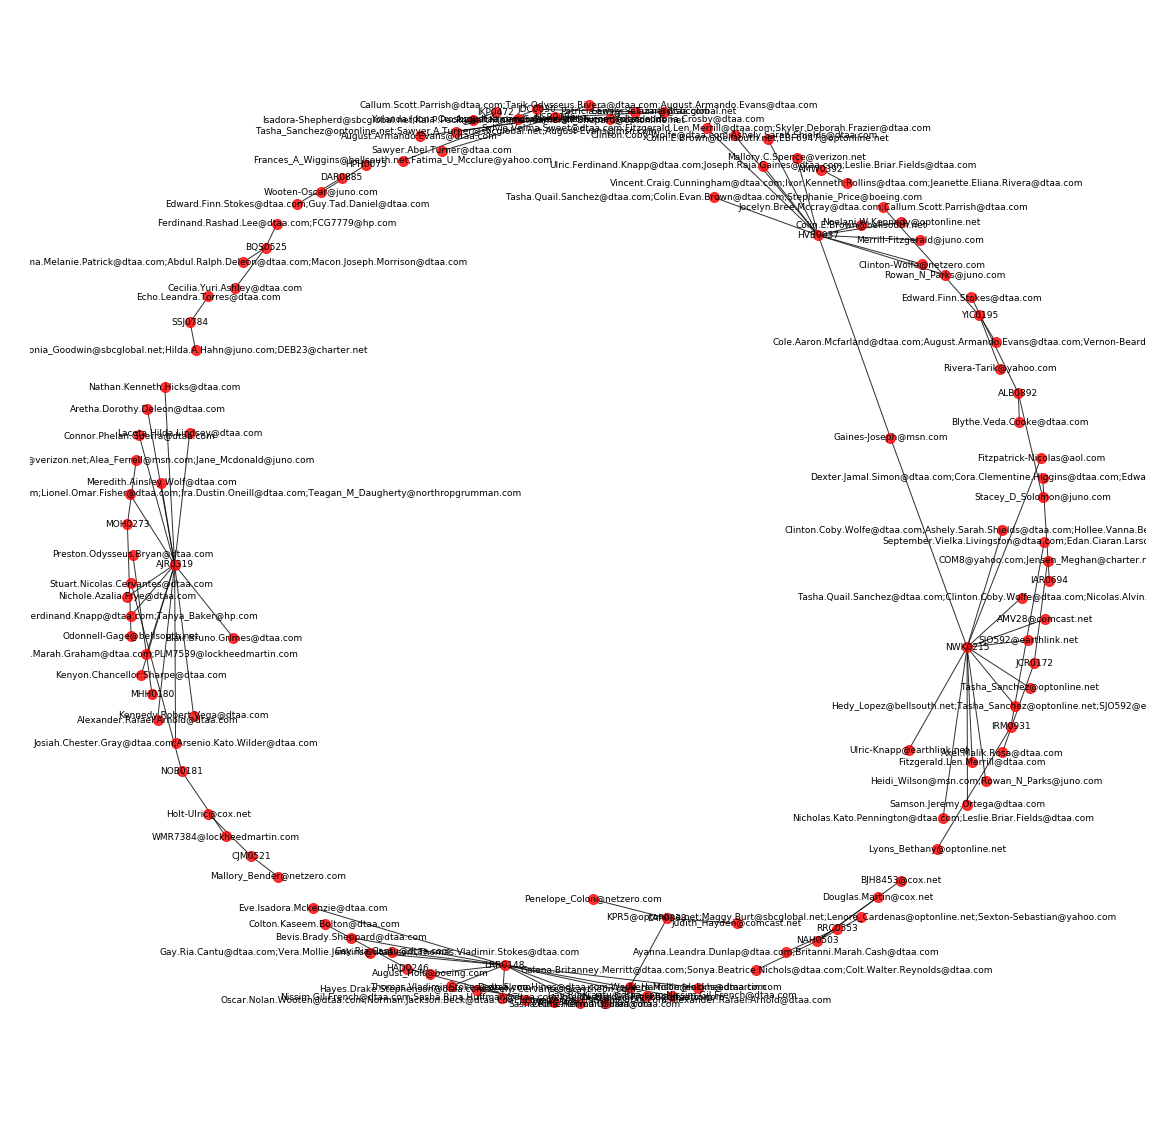

In [252]:
plt.figure(1,figsize=(20, 20)) 
plt.axis('off')

# layout = nx.circular_layout(GA)
# nx.draw_networkx_nodes(GA, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx(GA, with_labels=True, font_size=9, node_size=100, alpha=0.8)

In [263]:
nx.degree_centrality(GA)

{'AJR0319': 0.11475409836065574,
 'ALB0892': 0.02459016393442623,
 'AMV28@comcast.net': 0.00819672131147541,
 'AMW0392': 0.00819672131147541,
 'Alexander.Rafael.Arnold@dtaa.com': 0.00819672131147541,
 'Aretha.Dorothy.Deleon@dtaa.com': 0.00819672131147541,
 'August.Armando.Evans@dtaa.com': 0.00819672131147541,
 'August.Armando.Evans@dtaa.com;Yolanda.Idona.Crosby@dtaa.com': 0.00819672131147541,
 'August_Holt@boeing.com': 0.00819672131147541,
 'Aurora.Jael.Hopkins@dtaa.com;Raymond.Tate.Osborne@dtaa.com;Lionel.Omar.Fisher@dtaa.com;Ira.Dustin.Oneill@dtaa.com;Teagan_M_Daugherty@northropgrumman.com': 0.00819672131147541,
 'Axel.Malik.Rosa@dtaa.com': 0.00819672131147541,
 'Ayanna.Leandra.Dunlap@dtaa.com;Britanni.Marah.Cash@dtaa.com': 0.00819672131147541,
 'BJH8453@cox.net': 0.00819672131147541,
 'BQS0525': 0.02459016393442623,
 'Bevis.Brady.Sheppard@dtaa.com': 0.00819672131147541,
 'Blair.Bruno.Grimes@dtaa.com': 0.00819672131147541,
 'Blythe.Veda.Cooke@dtaa.com': 0.00819672131147541,
 'Bond-Ra

# Email sentiment df analysis

In [9]:
email=pd.read_pickle('email_sentiment_analysis_df_vader')
email.head(5)

id
{R3I7-S4TX96FG-8219JWFF}    0.4404
{R0R9-E4GL59IK-2907OSWJ}    0.3400
{G2B2-A8XY58CP-2847ZJZL}    0.2500
{A3A9-F4TH89AA-8318GFGK}    0.3818
{E8B7-C8FZ88UF-2946RUQQ}    0.8658
Name: content, dtype: float64

In [10]:
_dataset2_dir = "C:\\Users\\talha\\Documents\\DA\\da_project\\dataset2\\"

In [11]:
emp=pd.read_pickle('emp_info_last_access')

In [12]:
email=email.reset_index()
email_data=pd.read_csv(_dataset2_dir + "email_info.csv")
email_data=pd.merge(email_data, email, how='inner',on='id')
emp_n=emp.reset_index()

In [13]:
resigned_email=email_data[email_data['user'].isin(resignation['user_id'])]
still_email=email_data[email_data['user'].isin(emp[emp['left']==0]['user_id'])]

NameError: name 'resignation' is not defined

In [ ]:
email_neg = email_data[email_data['content_y']<-0.5]
email_pos = email_data[email_data['content_y']>0.5]

In [ ]:
email_emp_polarity=email_data.groupby('user')['content_y'].mean()
email_emp_polarity=email_emp_polarity.reset_index()

In [ ]:
emp_email =pd.merge(emp_n, email_emp_polarity , how='left',right_on='user', left_on='user_id')

In [ ]:
user_neg=emp_email[emp_email['content_y']<0]
user_pos=emp_email[emp_email['content_y']>0]

In [ ]:
print("Neg",user_neg['O'].mean())
user_pos['O'].mean()


In [ ]:
user_neg.groupby(['role','left']).size()